In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
df=pd.read_csv("news_share_data.csv")

In [5]:
df.shape

(1003, 22)

In [6]:
df.head(1003)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/2014 0:00,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/2014 0:00,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,4/17/2014 0:00,0.606557,6,2,0,4.913978,4,...,5709.823,4020.608,1950.000,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,4/17/2014 0:00,0.491018,4,2,0,4.674627,6,...,4352.491,2358.572,4200.000,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,4/17/2014 0:00,0.634518,3,0,2,4.177665,9,...,6060.771,3296.052,3400.000,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,4/17/2014 0:00,0.447368,7,1,0,4.667961,8,...,4763.083,2709.129,0.000,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900


In [7]:
df.describe()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


In [8]:
df.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [9]:
df.dtypes


article_id                      int64
title                          object
text                           object
published_date                 object
unique_tokens_rate            float64
num_hrefs                       int64
num_imgs                        int64
num_videos                      int64
average_token_length          float64
num_keywords                    int64
data_channel                   object
min_avg_key                   float64
max_avg_key                   float64
avg_avg_key                   float64
href_avg_shares               float64
global_subjectivity           float64
global_sentiment_polarity     float64
global_rate_positive_words    float64
global_rate_negative_words    float64
title_subjectivity            float64
title_sentiment_polarity      float64
shares                          int64
dtype: object

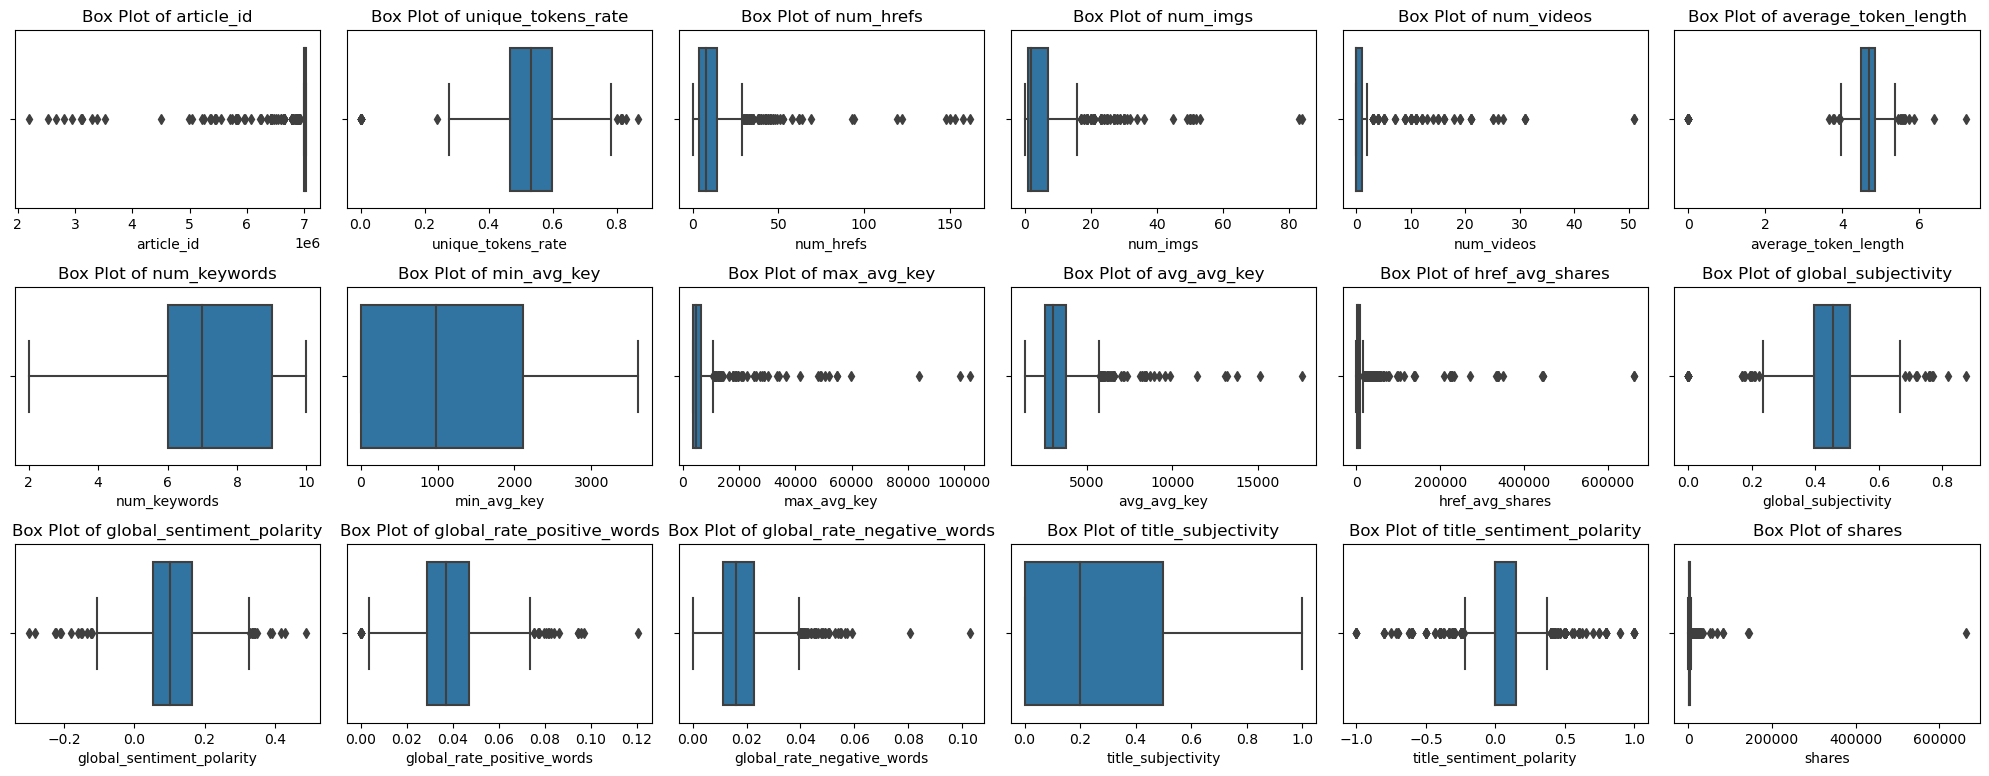

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# box plot to see outlayer
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()

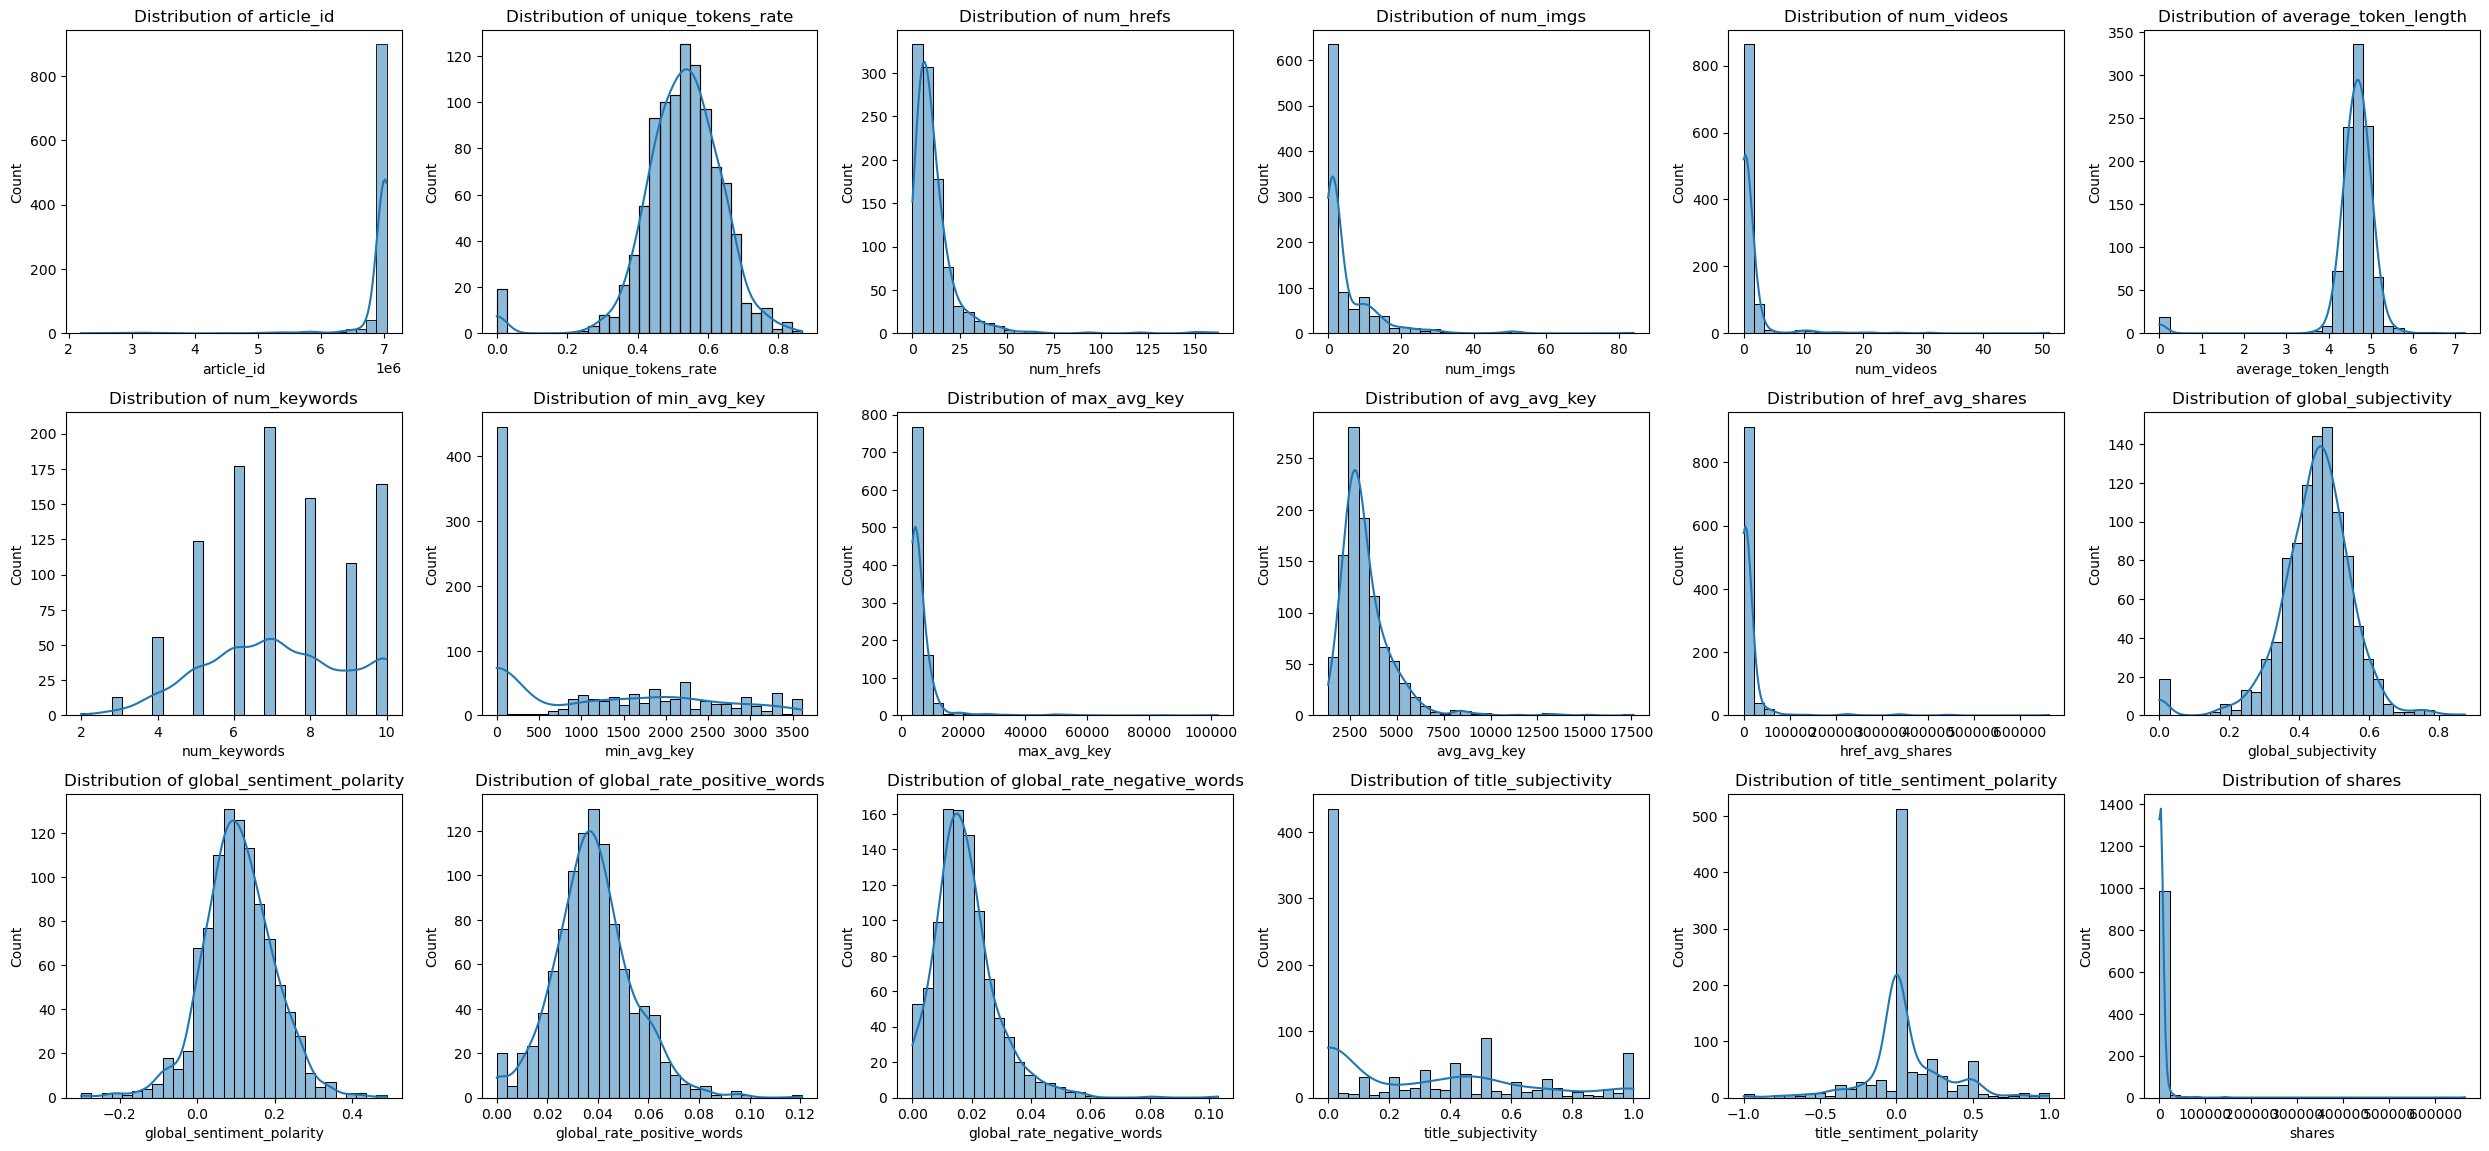

In [13]:
#distribution
plt.figure(figsize=(25, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


In [14]:

numerical_summary = df.describe()

#iqr method
Q1 = numerical_summary.loc['25%']
Q3 = numerical_summary.loc['75%']
IQR = Q3 - Q1

# outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display outlayes 
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
outliers = outliers[outliers > 0]
print("Features with potential outliers:")
print(outliers)


Features with potential outliers:
article_id                    127
average_token_length           36
avg_avg_key                    48
global_rate_negative_words     40
global_rate_positive_words     36
global_sentiment_polarity      27
global_subjectivity            42
href_avg_shares               115
max_avg_key                    63
num_hrefs                      66
num_imgs                       68
num_videos                     70
shares                        108
title_sentiment_polarity      202
unique_tokens_rate             27
dtype: int64


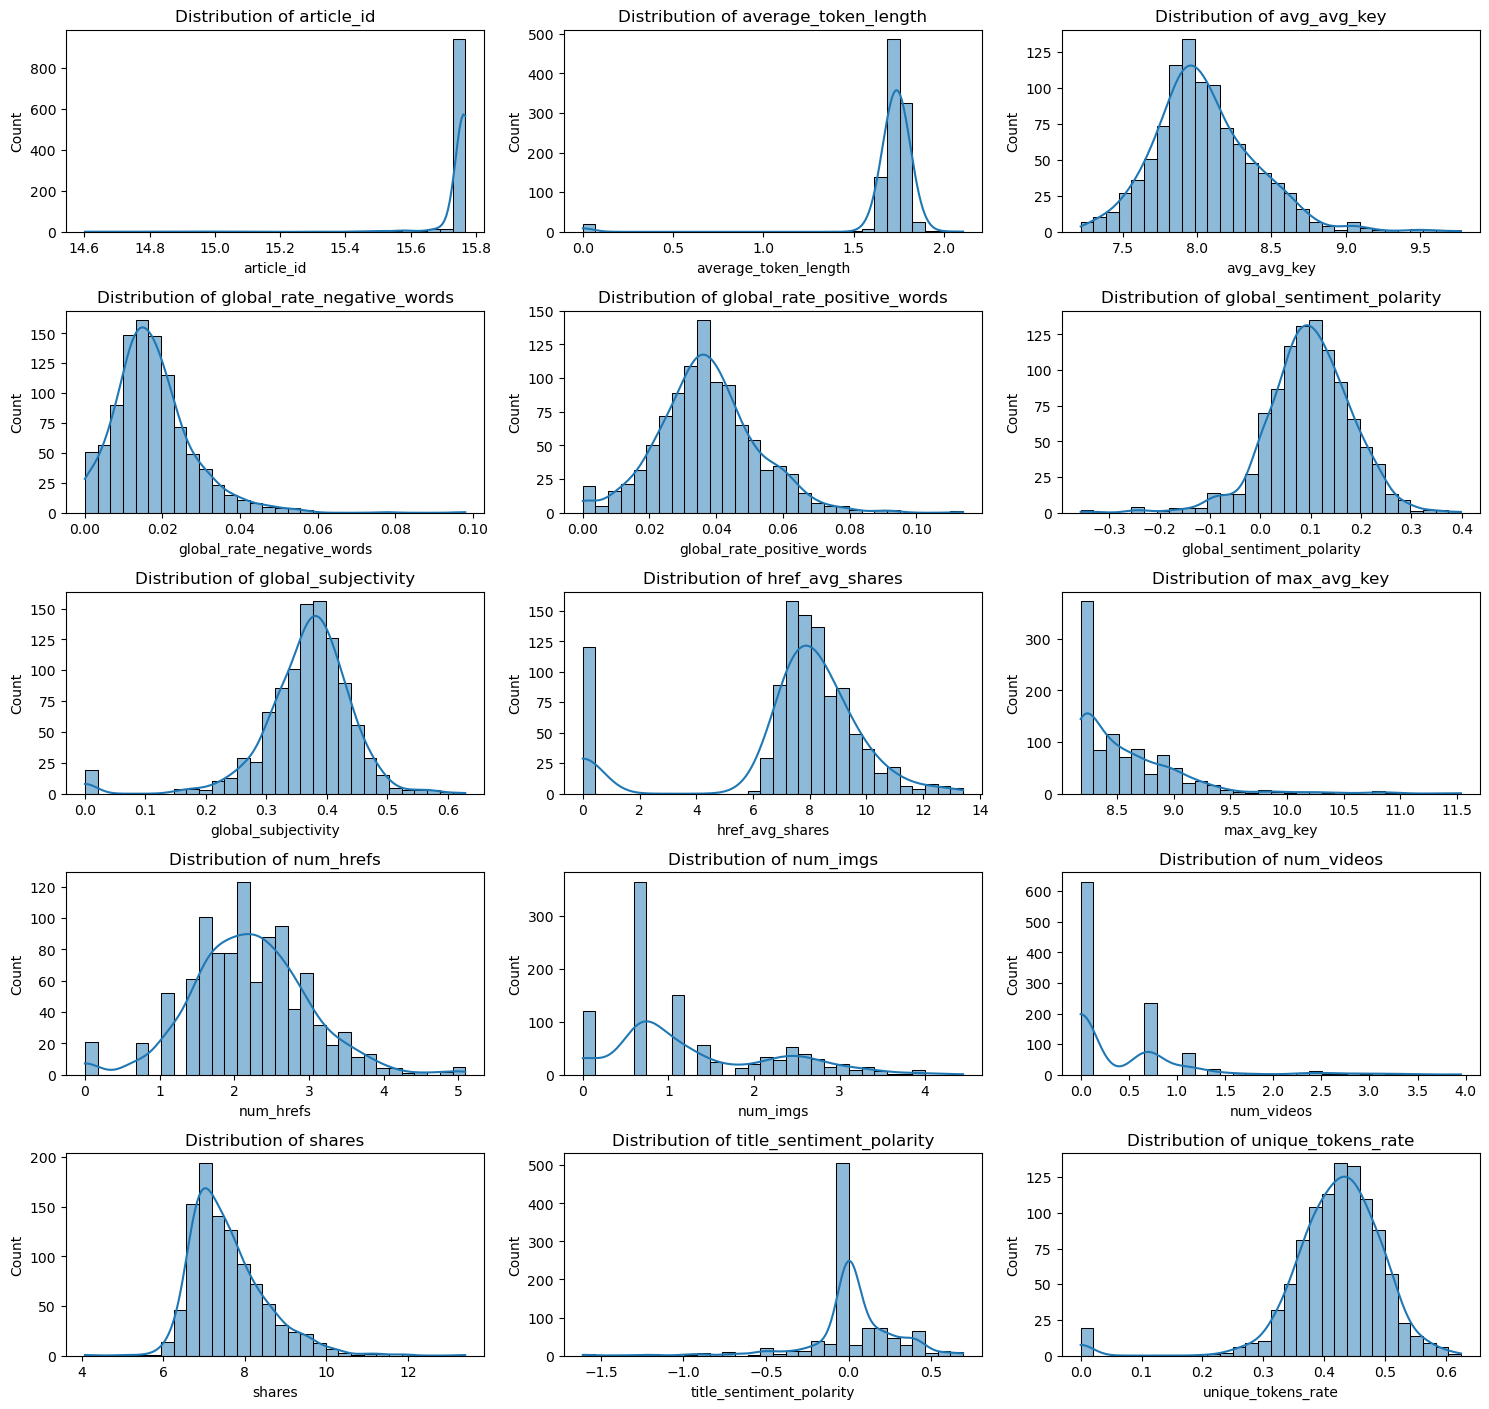

In [15]:
import numpy as np

features_with_outliers = ['article_id', 'average_token_length', 'avg_avg_key', 'global_rate_negative_words',
                           'global_rate_positive_words', 'global_sentiment_polarity', 'global_subjectivity',
                           'href_avg_shares', 'max_avg_key', 'num_hrefs', 'num_imgs', 'num_videos', 'shares',
                           'title_sentiment_polarity', 'unique_tokens_rate']

#logarithm transformation
for feature in features_with_outliers:
    df[feature] = np.log1p(df[feature])
# histogram
plt.figure(figsize=(15, 25))

for i, feature in enumerate(features_with_outliers, 1):
    plt.subplot(9,3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [16]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment features
sentiment_features = ['title_sentiment_polarity', 'global_sentiment_polarity']

#winsorizing technique
for feature in sentiment_features:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])


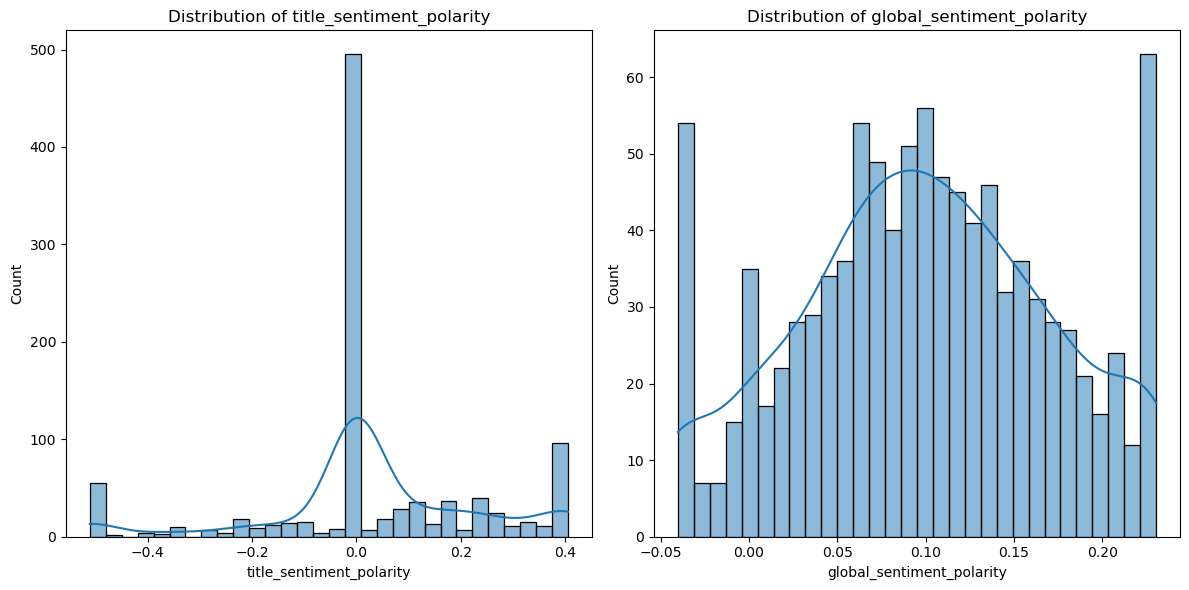

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

for i, feature in enumerate(sentiment_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


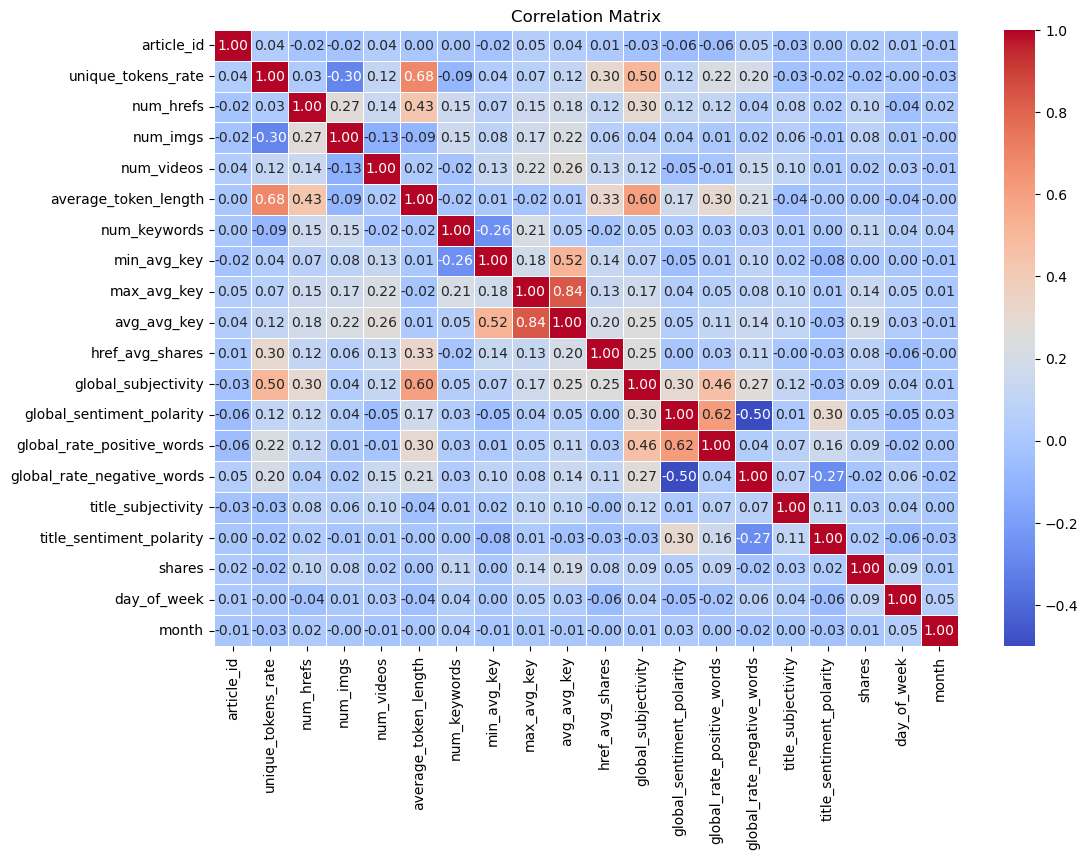

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# one-hot encoding for title column
title_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
title_encoded = title_vectorizer.fit_transform(df['title']).toarray()

# Eone-hot encoding for text column 
text_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
text_encoded = text_vectorizer.fit_transform(df['text']).toarray()


In [72]:
df.head(1003)

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day_of_week,month
0,15.763460,0.495194,1.791759,1.386294,0.693147,1.719116,5,1459.500,8.480258,8.123088,7.514436,0.339156,0.038030,0.036076,0.024195,0.250000,0.223144,7.378384,0,3
1,15.763465,0.438008,1.609438,0.693147,0.000000,1.729299,7,0.000,8.183703,7.846733,9.047939,0.344091,0.166306,0.043963,0.003738,0.000000,0.000000,7.313887,1,4
2,15.763462,0.455674,2.197225,0.693147,0.000000,1.727657,7,2270.889,8.256815,8.012736,7.638840,0.334717,0.043887,0.034685,0.019418,0.000000,0.000000,7.244942,1,4
3,15.765981,0.422582,1.609438,0.693147,0.000000,1.805607,9,0.000,8.183703,7.534978,7.696667,0.399835,0.146366,0.046701,0.011881,0.000000,0.000000,7.170888,1,4
4,15.693656,0.463035,1.945910,2.302585,0.000000,1.674480,7,3581.094,9.042448,8.547979,6.692084,0.487681,0.075568,0.052368,0.034349,0.000000,0.000000,8.006701,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,15.764690,0.474093,1.945910,1.098612,0.000000,1.777319,4,3329.921,8.650118,8.299437,7.576097,0.401135,-0.040280,0.005362,0.021277,0.000000,0.000000,7.170888,3,4
999,15.761825,0.399459,1.609438,1.098612,0.000000,1.736005,6,0.000,8.378733,7.766236,8.343078,0.375035,0.174958,0.052337,0.011869,0.000000,0.000000,7.003974,3,4
1000,15.761853,0.491348,1.386294,0.000000,1.098612,1.644354,9,2126.118,8.709757,8.100784,8.131825,0.420628,0.009761,0.025064,0.044672,0.600000,-0.510826,8.389587,3,4
1001,15.761849,0.369747,2.079442,0.693147,0.000000,1.734829,8,0.000,8.468860,7.904752,0.000000,0.401755,0.135378,0.067568,0.020183,0.833333,0.360003,7.550135,3,4


In [75]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(target_variable, axis=1)  # Features
y = df_filtered[target_variable] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.ensemble import RandomForestRegressor  

model = RandomForestRegressor() 


In [77]:
model.fit(X_train, y_train)


RandomForestRegressor()

In [78]:
predictions = model.predict(X_test)


In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9510289228083314


Mean Squared Error: 0.9510289228083314

Feature Importance:
max_avg_key: 0.2525249033493657
avg_avg_key: 0.24128688590787192
num_hrefs: 0.18525776112031078
num_keywords: 0.0862167678016014
479: 0.04447856188531642
96: 0.030571814709162193
data_channel_Tech: 0.027066426685447367
text_If you're getting a tax refund this year, are you planning to use it responsibly or splurge instead?

According to a survey conducted by travel site Hipmunk, 54% of online adults in the United States said if they had to choose one thing, they would spend the money on travel. This contrasts with other surveys on tax refund spending, likely due to the wording of the survey question, which asked people what they would do if they "could" spend the money on "only one thing."

SEE ALSO: 6 Ways to Get a Bigger Tax Refund

The Hipmunk survey, which polled 4,000 people, also found that 25% of respondents would save their money, 17% would pay down debt and 4% would go shopping.

Asking what people plan to actually do

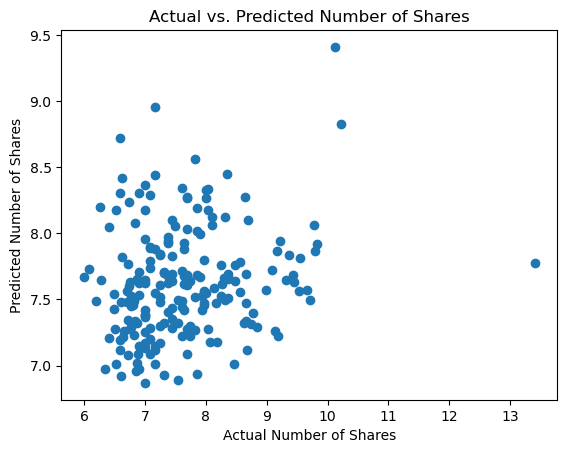

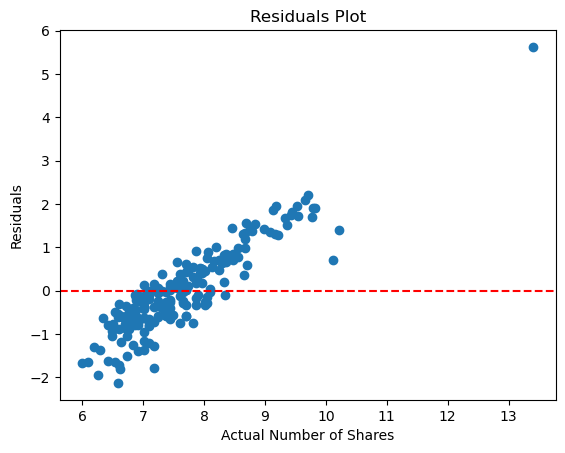


Permutation Importance:
num_hrefs: 0.05029563811746711
num_keywords: 0.04064463974302681
max_avg_key: 0.028708856178668984
avg_avg_key: 0.01660117438773474
96: 0.0019678617683088983
title_'I'm Able to Make My Mark': 10 Employees Describe Startup Life: 0.0
title_Animals Take Over the Paris Metro in Enchanting Photo Series: 0.0
title_Beyonce Crashes Coachella With Surprise Dance Break: 0.0
title_Case Study Shows How Twitter Advertising Can Pay Off: 0.0
title_How Brands Are Using Twitter's Redesigned Profile Pages: 0.0
title_In Signing Climate Statement, Shell Charts Different Course on Global Warming: 0.0
title_My Escape From Eastern Ukraine: 0.0
title_Space Nerds Rejoice: NASA Tweets Even More 'Cosmos' Photos: 0.0
title_Study: 54% of Online Adults Would Spend Tax Refunds on Travel: 0.0
text_Faced with ominous scientific warnings on global warming caused by the burning of fossil fuels like coal, oil and natural gas, two energy giants -- Exxon Mobil Corp. and Royal Dutch Shell -- have se

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance


y_pred = model.predict(X_test)

# Evaluate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    feature_names = X_test.columns
    importance_dict = dict(zip(feature_names, feature_importance))
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    print("\nFeature Importance:")
    for feature, importance in sorted_importance:
        print(f"{feature}: {importance}")

# Visualize Predicted vs. Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Number of Shares")
plt.ylabel("Predicted Number of Shares")
plt.title("Actual vs. Predicted Number of Shares")
plt.show()

# Visualize Residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Number of Shares")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Permutation Importance
if hasattr(model, 'feature_importances_'):
    perm_importance = permutation_importance(model, X_test, y_test)
    sorted_perm_importance = sorted(zip(X_test.columns, perm_importance.importances_mean), key=lambda x: x[1], reverse=True)

    print("\nPermutation Importance:")
    for feature, importance in sorted_perm_importance:
        print(f"{feature}: {importance}")


In [82]:
df.head(1003)

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day_of_week,month
0,15.763460,0.495194,1.791759,1.386294,0.693147,1.719116,5,1459.500,8.480258,8.123088,7.514436,0.339156,0.038030,0.036076,0.024195,0.250000,0.223144,7.378384,0,3
1,15.763465,0.438008,1.609438,0.693147,0.000000,1.729299,7,0.000,8.183703,7.846733,9.047939,0.344091,0.166306,0.043963,0.003738,0.000000,0.000000,7.313887,1,4
2,15.763462,0.455674,2.197225,0.693147,0.000000,1.727657,7,2270.889,8.256815,8.012736,7.638840,0.334717,0.043887,0.034685,0.019418,0.000000,0.000000,7.244942,1,4
3,15.765981,0.422582,1.609438,0.693147,0.000000,1.805607,9,0.000,8.183703,7.534978,7.696667,0.399835,0.146366,0.046701,0.011881,0.000000,0.000000,7.170888,1,4
4,15.693656,0.463035,1.945910,2.302585,0.000000,1.674480,7,3581.094,9.042448,8.547979,6.692084,0.487681,0.075568,0.052368,0.034349,0.000000,0.000000,8.006701,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,15.764690,0.474093,1.945910,1.098612,0.000000,1.777319,4,3329.921,8.650118,8.299437,7.576097,0.401135,-0.040280,0.005362,0.021277,0.000000,0.000000,7.170888,3,4
999,15.761825,0.399459,1.609438,1.098612,0.000000,1.736005,6,0.000,8.378733,7.766236,8.343078,0.375035,0.174958,0.052337,0.011869,0.000000,0.000000,7.003974,3,4
1000,15.761853,0.491348,1.386294,0.000000,1.098612,1.644354,9,2126.118,8.709757,8.100784,8.131825,0.420628,0.009761,0.025064,0.044672,0.600000,-0.510826,8.389587,3,4
1001,15.761849,0.369747,2.079442,0.693147,0.000000,1.734829,8,0.000,8.468860,7.904752,0.000000,0.401755,0.135378,0.067568,0.020183,0.833333,0.360003,7.550135,3,4


In [87]:
correlations = df[['day_of_week', 'month', 'shares']].corr()
print(correlations)


             day_of_week     month    shares
day_of_week     1.000000  0.045641  0.093667
month           0.045641  1.000000  0.007033
shares          0.093667  0.007033  1.000000


In [88]:
# Assuming 'day_of_week', 'month', and other features are part of your X
X = df.drop(['shares'], axis=1)
y = df['shares']


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model without 'day_of_week' and 'month'
model_no_dates = LinearRegression()
model_no_dates.fit(X_train.drop(['day_of_week', 'month'], axis=1), y_train)
y_pred_no_dates = model_no_dates.predict(X_test.drop(['day_of_week', 'month'], axis=1))
mse_no_dates = mean_squared_error(y_test, y_pred_no_dates)
print("MSE without dates:", mse_no_dates)

# Model with 'day_of_week' and 'month'
model_with_dates = LinearRegression()
model_with_dates.fit(X_train, y_train)
y_pred_with_dates = model_with_dates.predict(X_test)
mse_with_dates = mean_squared_error(y_test, y_pred_with_dates)
print("MSE with dates:", mse_with_dates)


MSE without dates: 0.8671740473702183
MSE with dates: 0.8623787867482787


In [94]:

X = df.drop(['shares'], axis=1)
y = df['shares']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model without 'day_of_week' and 'month'
model_no_dates = LinearRegression()
model_no_dates.fit(X_train.drop(['day_of_week', 'month'], axis=1), y_train)
y_pred_no_dates = model_no_dates.predict(X_test.drop(['day_of_week', 'month'], axis=1))
mse_no_dates = mean_squared_error(y_test, y_pred_no_dates)
print("MSE without dates:", mse_no_dates)

# Model with 'day_of_week' and 'month'
model_with_dates = LinearRegression()
model_with_dates.fit(X_train, y_train)
y_pred_with_dates = model_with_dates.predict(X_test)
mse_with_dates = mean_squared_error(y_test, y_pred_with_dates)
print("MSE with dates:", mse_with_dates)

MSE without dates: 0.8671740473702183
MSE with dates: 0.8623787867482787


In [99]:

pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [100]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Create an XGBoost regressor
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate mean squared error on the test set
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)

# Cross-validation to evaluate the model performance
cross_val_mse_xgb = -cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean Cross-Validation MSE (XGBoost):", cross_val_mse_xgb.mean())


Mean Squared Error (XGBoost): 1.0075399371247975
Mean Cross-Validation MSE (XGBoost): 0.9100279578892222
